## Credit Card Fraud Detection
Anonymized credit card transactions labeled as fraudulent or genuine

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


In [118]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [119]:
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [120]:
# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

In [121]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

In [123]:
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [124]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [125]:
df.shape

(284807, 31)

In [126]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [127]:
#observe the different feature type present in the data
df.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Here we will observe the distribution of our classes
### All features are float data types except  Target class(int)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### All features values are non-null. There is no missing values.

In [129]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.82725143693798 %
    Fraudulent : 0.1727485630620034 %


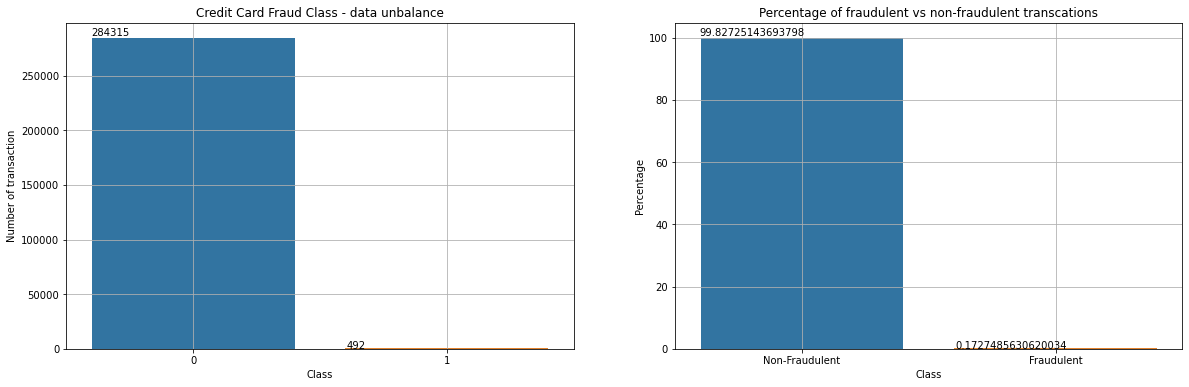

In [130]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
ax=sns.countplot(df["Class"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")
plt.grid()
plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
ax=sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.grid()

**Observation**

The dataset has very high class imbalance. Only 492 records are there labeled as fradudulent transaction. 284315 records are there labeled as non-fradudulent transaction

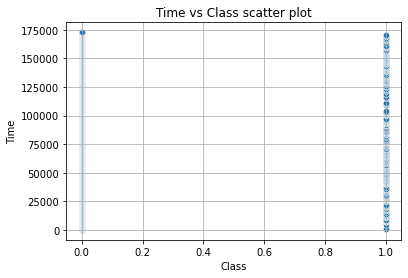

In [131]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot( df["Class"],df["Time"])
plt.title("Time vs Class scatter plot")
plt.grid()


***Observation***

There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

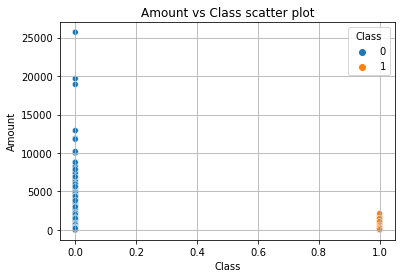

In [132]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Class"],df["Amount"],hue=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.grid()

**Observation**

low amount transactions are more likely to be fraudulent than high amount transaction.

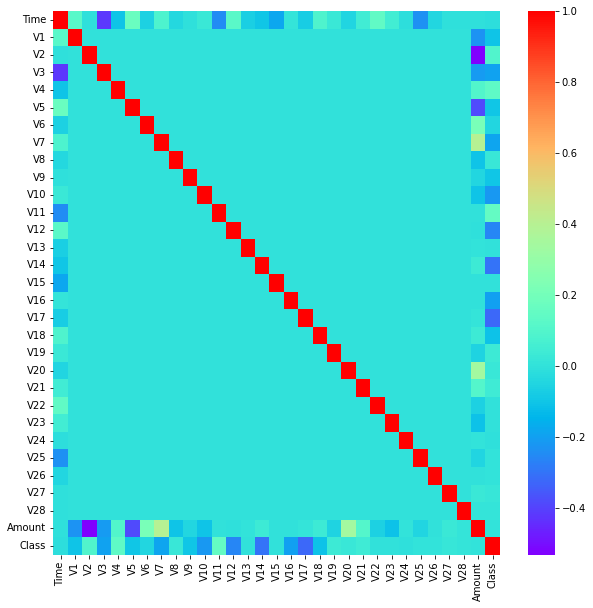

In [133]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),cmap='rainbow')
plt.show()

### Plotting all the variable in displot to visualise the distribution

<Figure size 432x288 with 0 Axes>

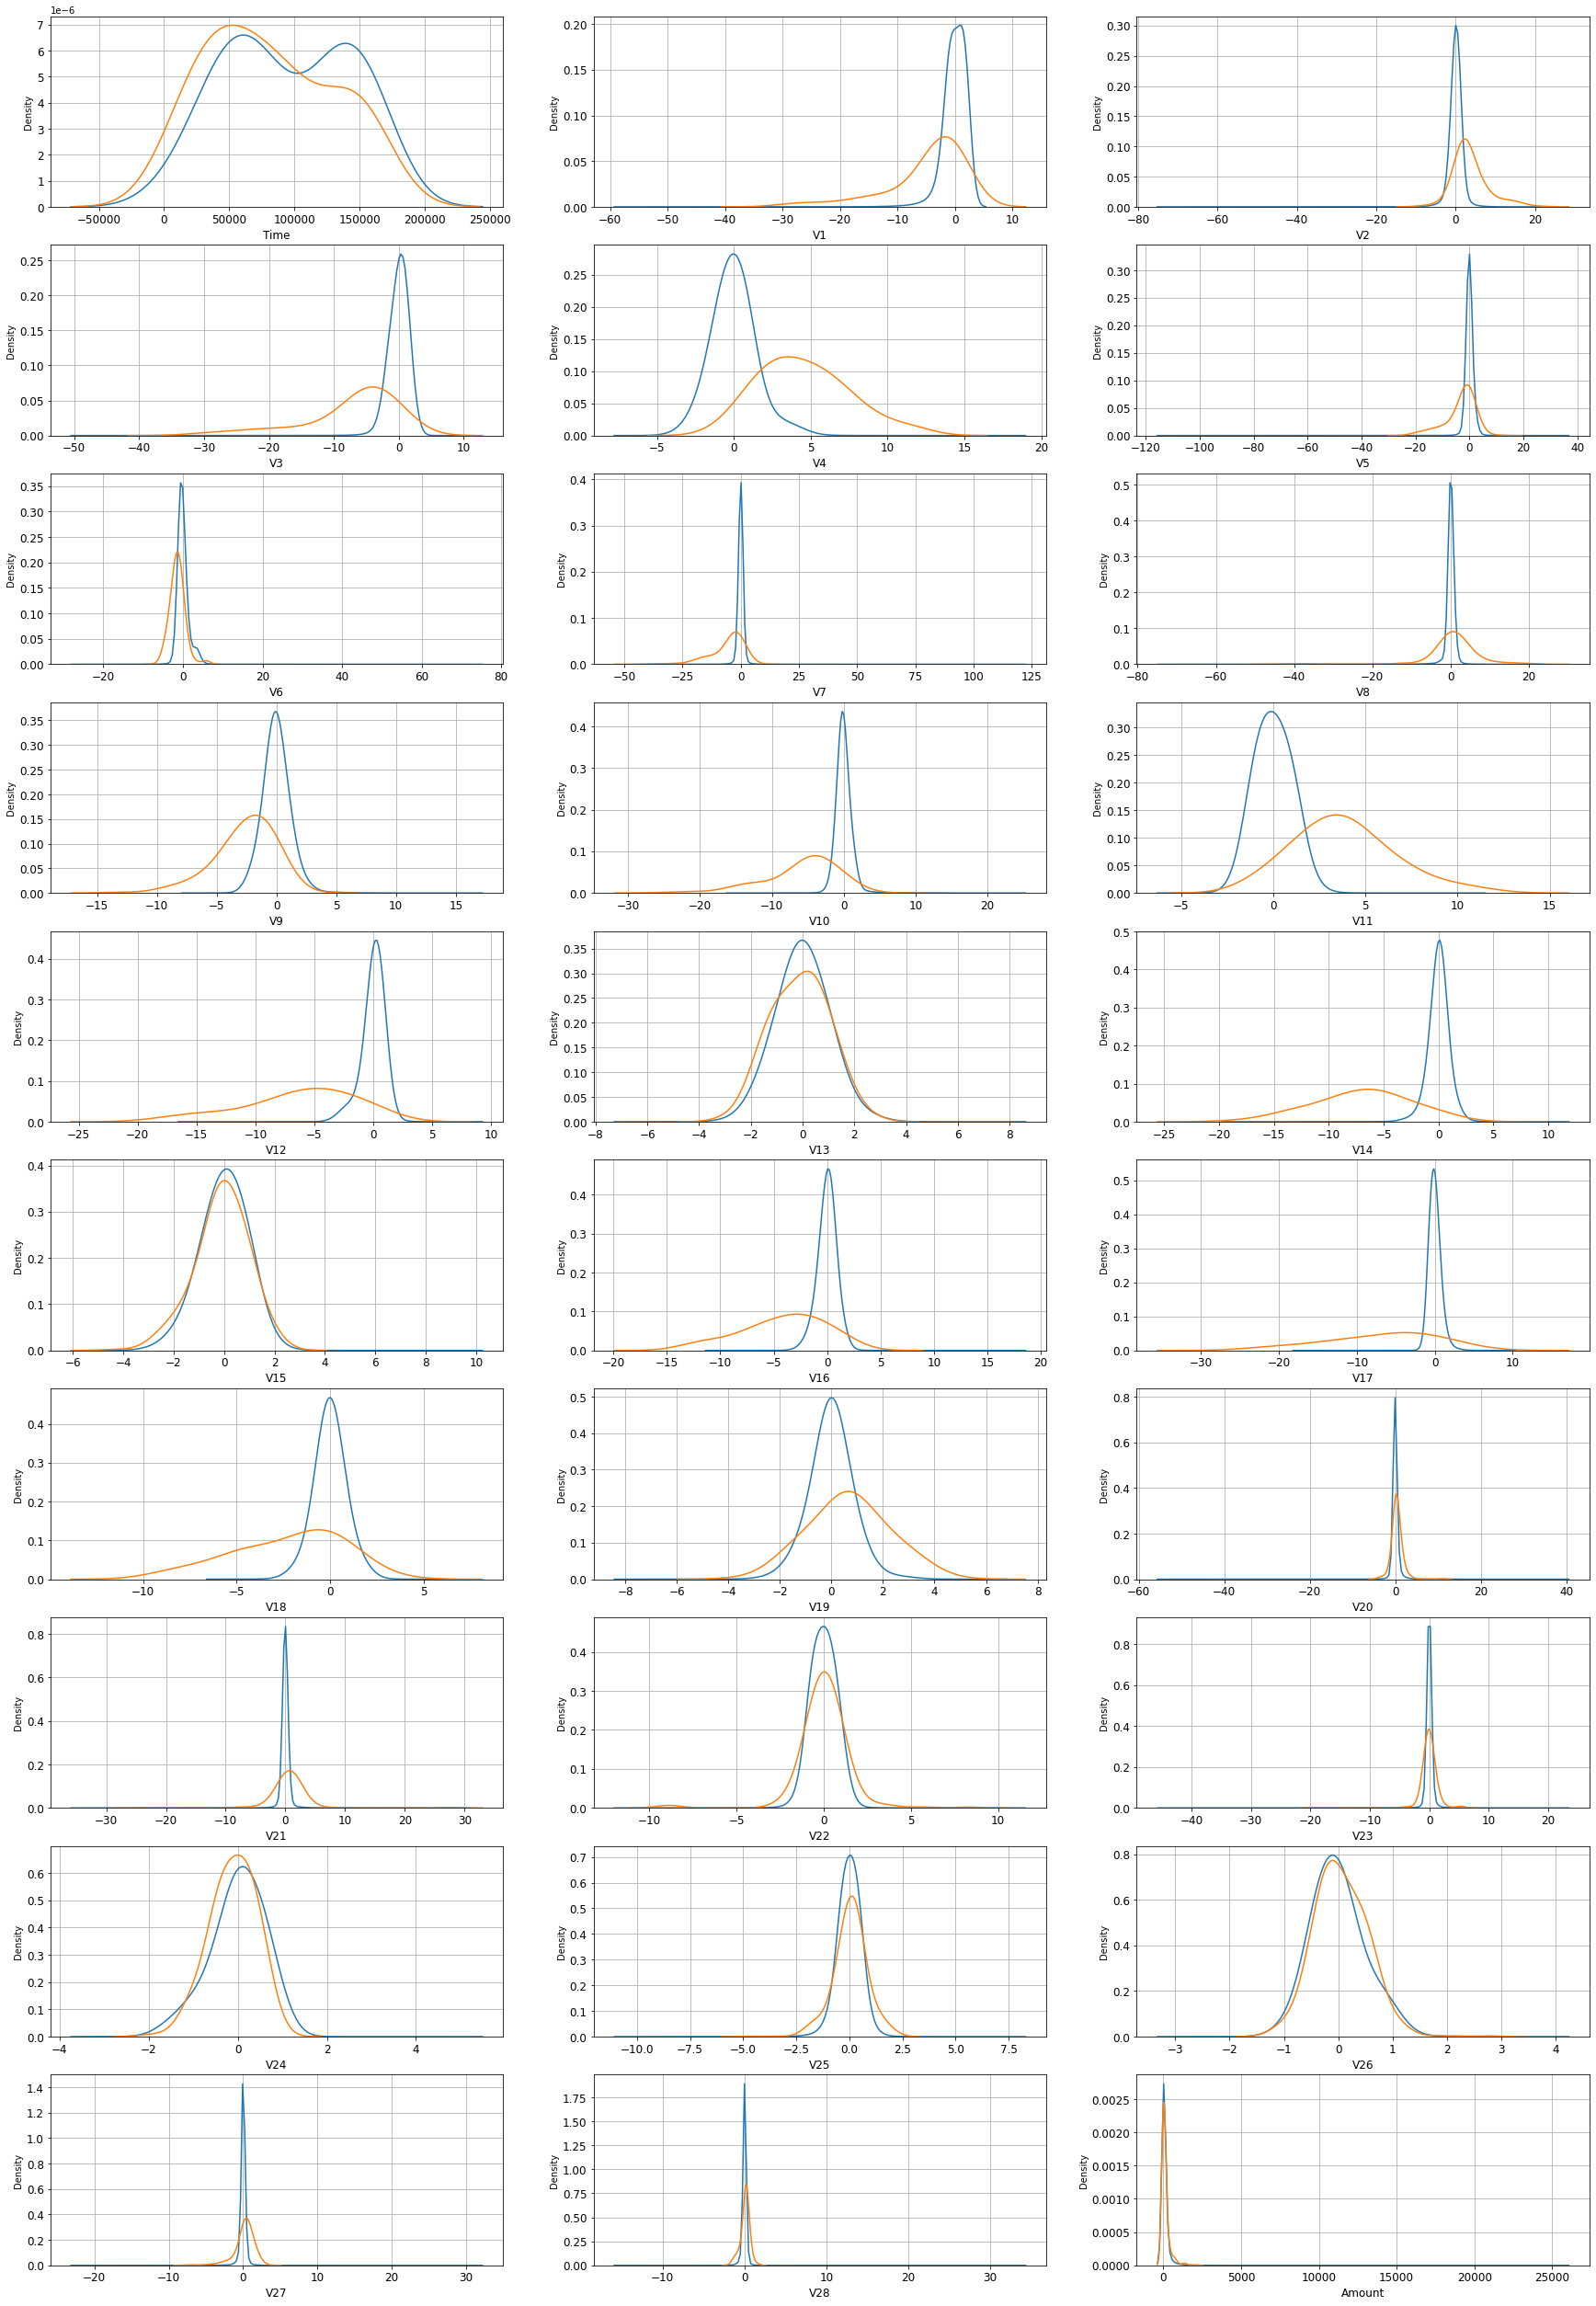

In [134]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    i += 1
    plt.subplot(10,3,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
plt.show()

**Observation**
#### Most of the features distributions are overlapping for both the fraud and non-fraud transactions.

**Dropping Time column as this feature is not going to help in the model building.**

In [135]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


### Splitting the data into train & test data

In [136]:
y = df["Class"]  #class variable
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [137]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [138]:
# Checking the split of the class label
print(" Fraudulent Count for Full data : ",np.sum(y))
print(" Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
 Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


In [139]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [140]:
print(X_train[["Amount"]])

          Amount
265518 -0.204315
180305 -0.264579
42664   2.130828
198723 -0.221294
82325   0.892136
...          ...
233802 -0.222825
85418   0.208629
29062   0.325957
13766  -0.293807
17677  -0.208907

[227845 rows x 1 columns]


In [141]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


In [142]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.013918
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.141267
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.752540
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.292415
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.285317


### Plotting the distribution of a variable

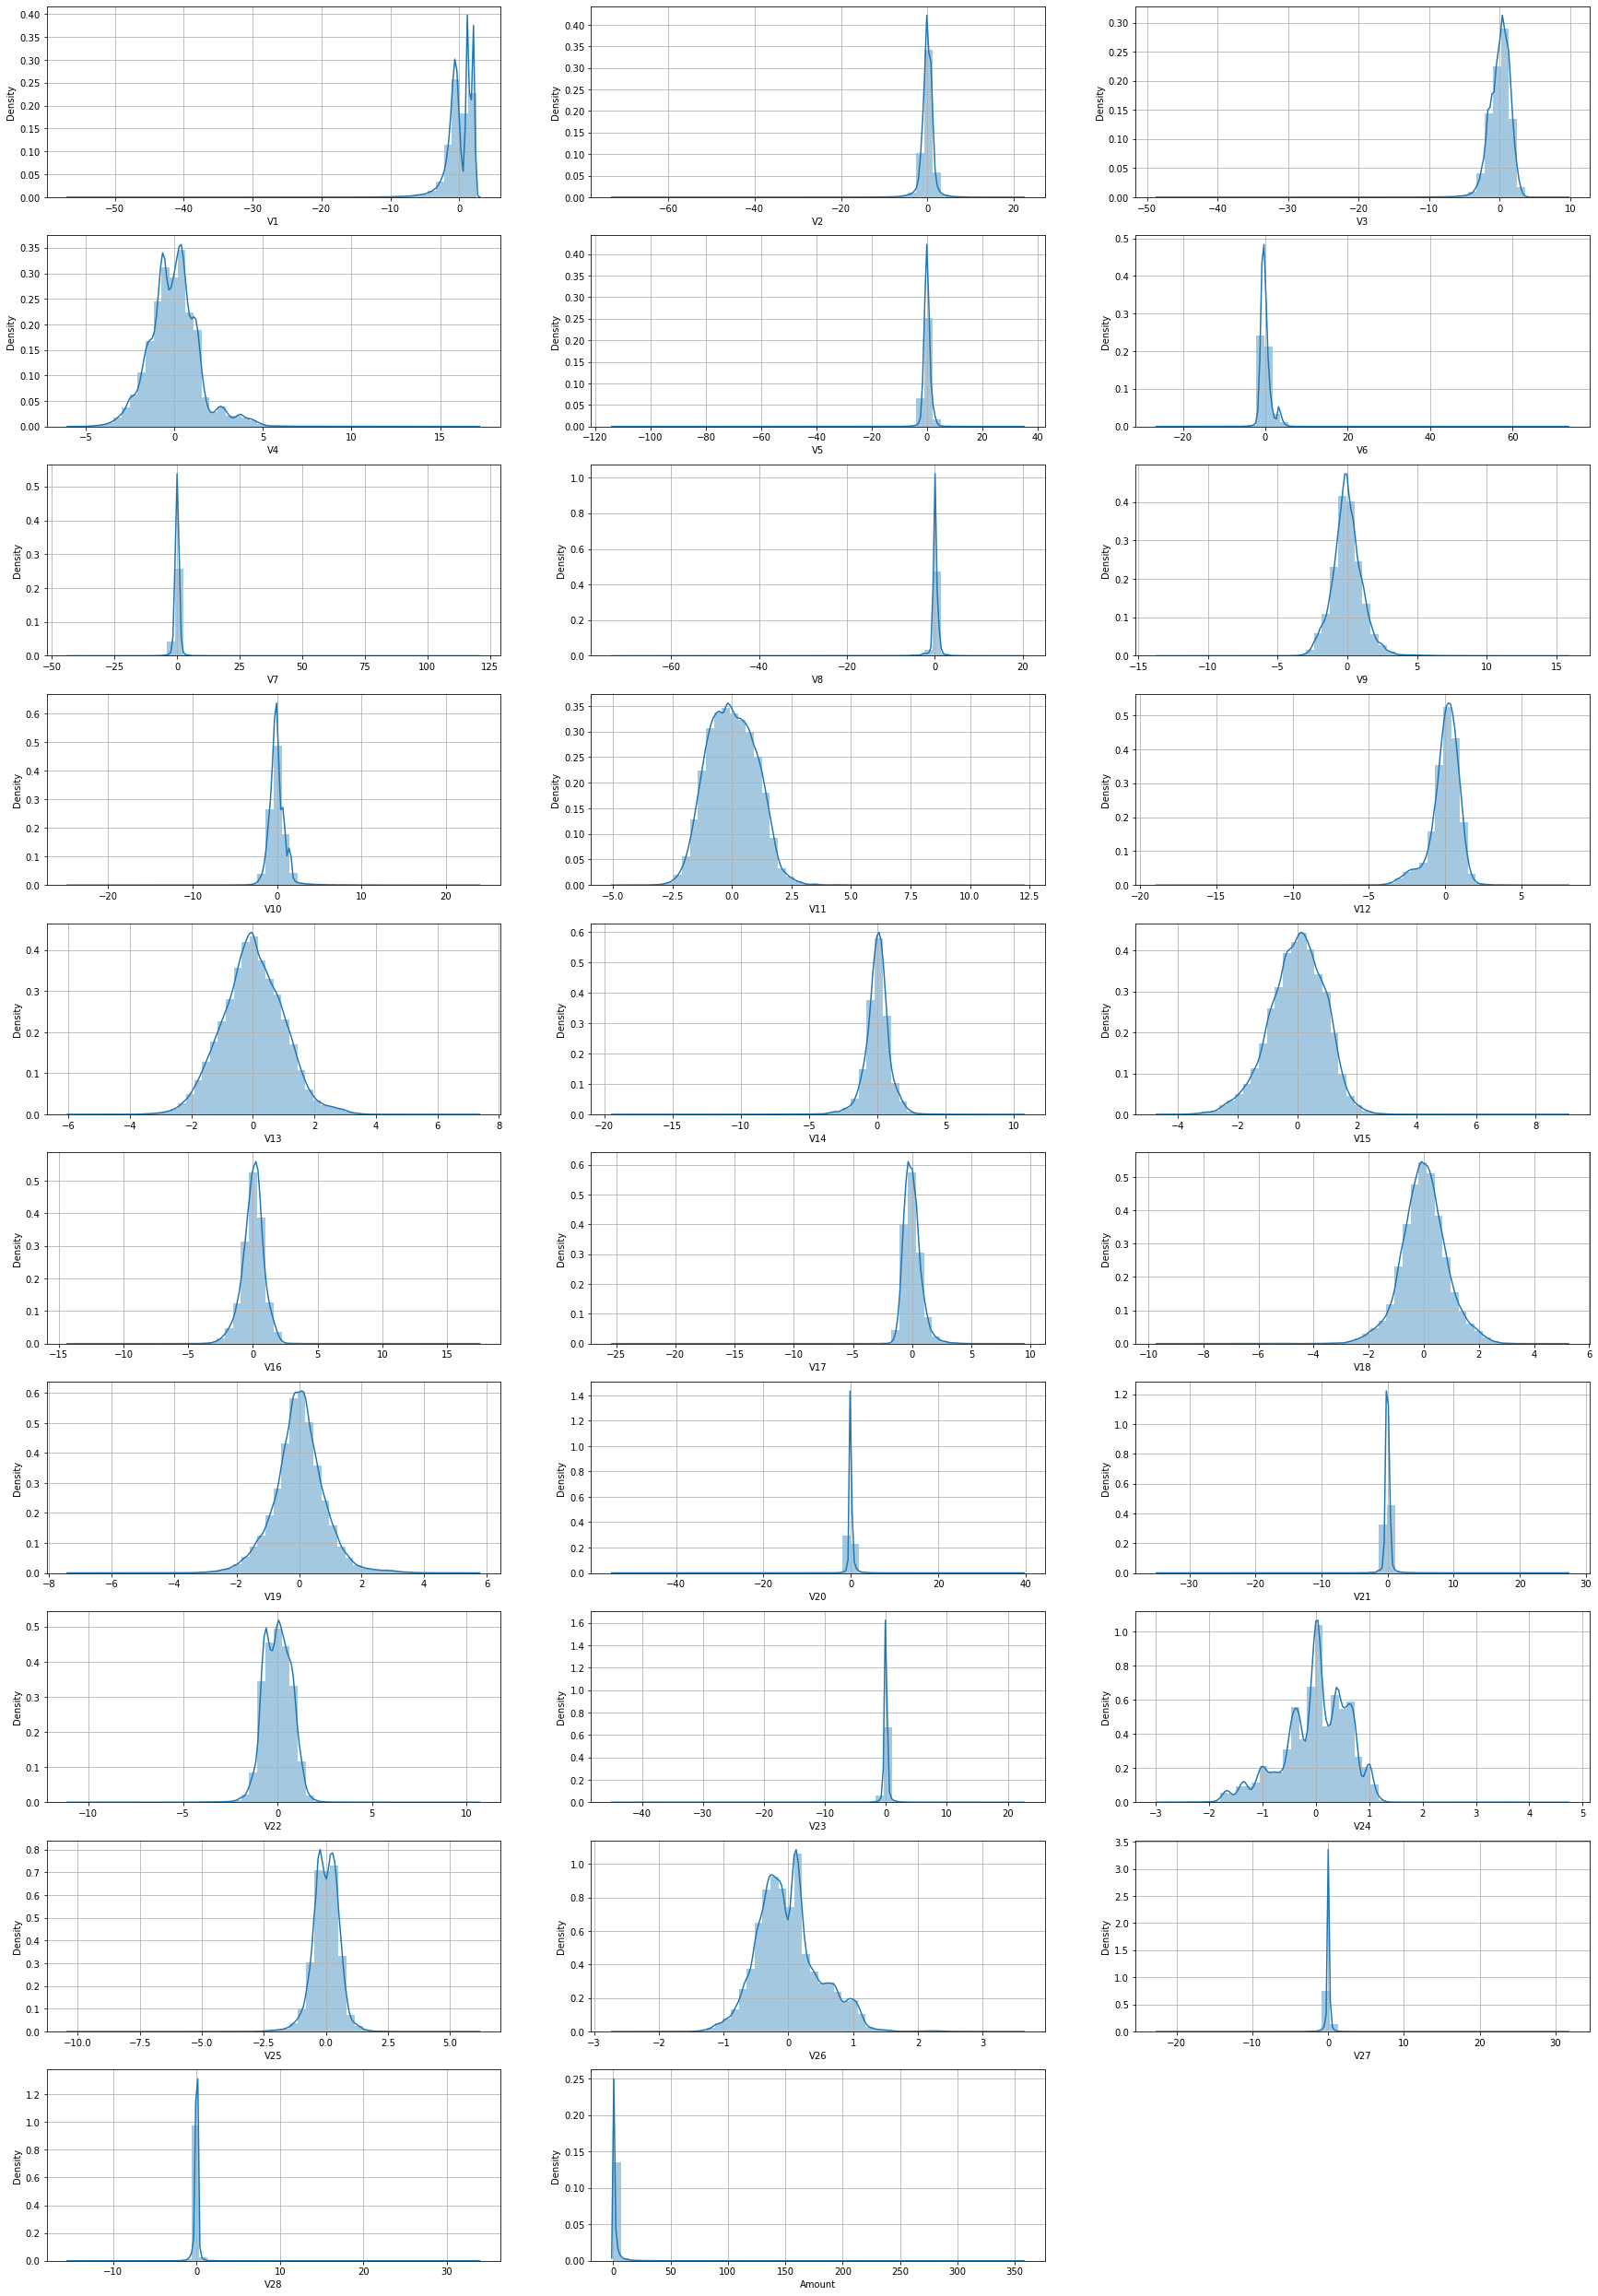

In [143]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X_train[col])
    plt.grid()

plt.show()

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [144]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


In [145]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [146]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

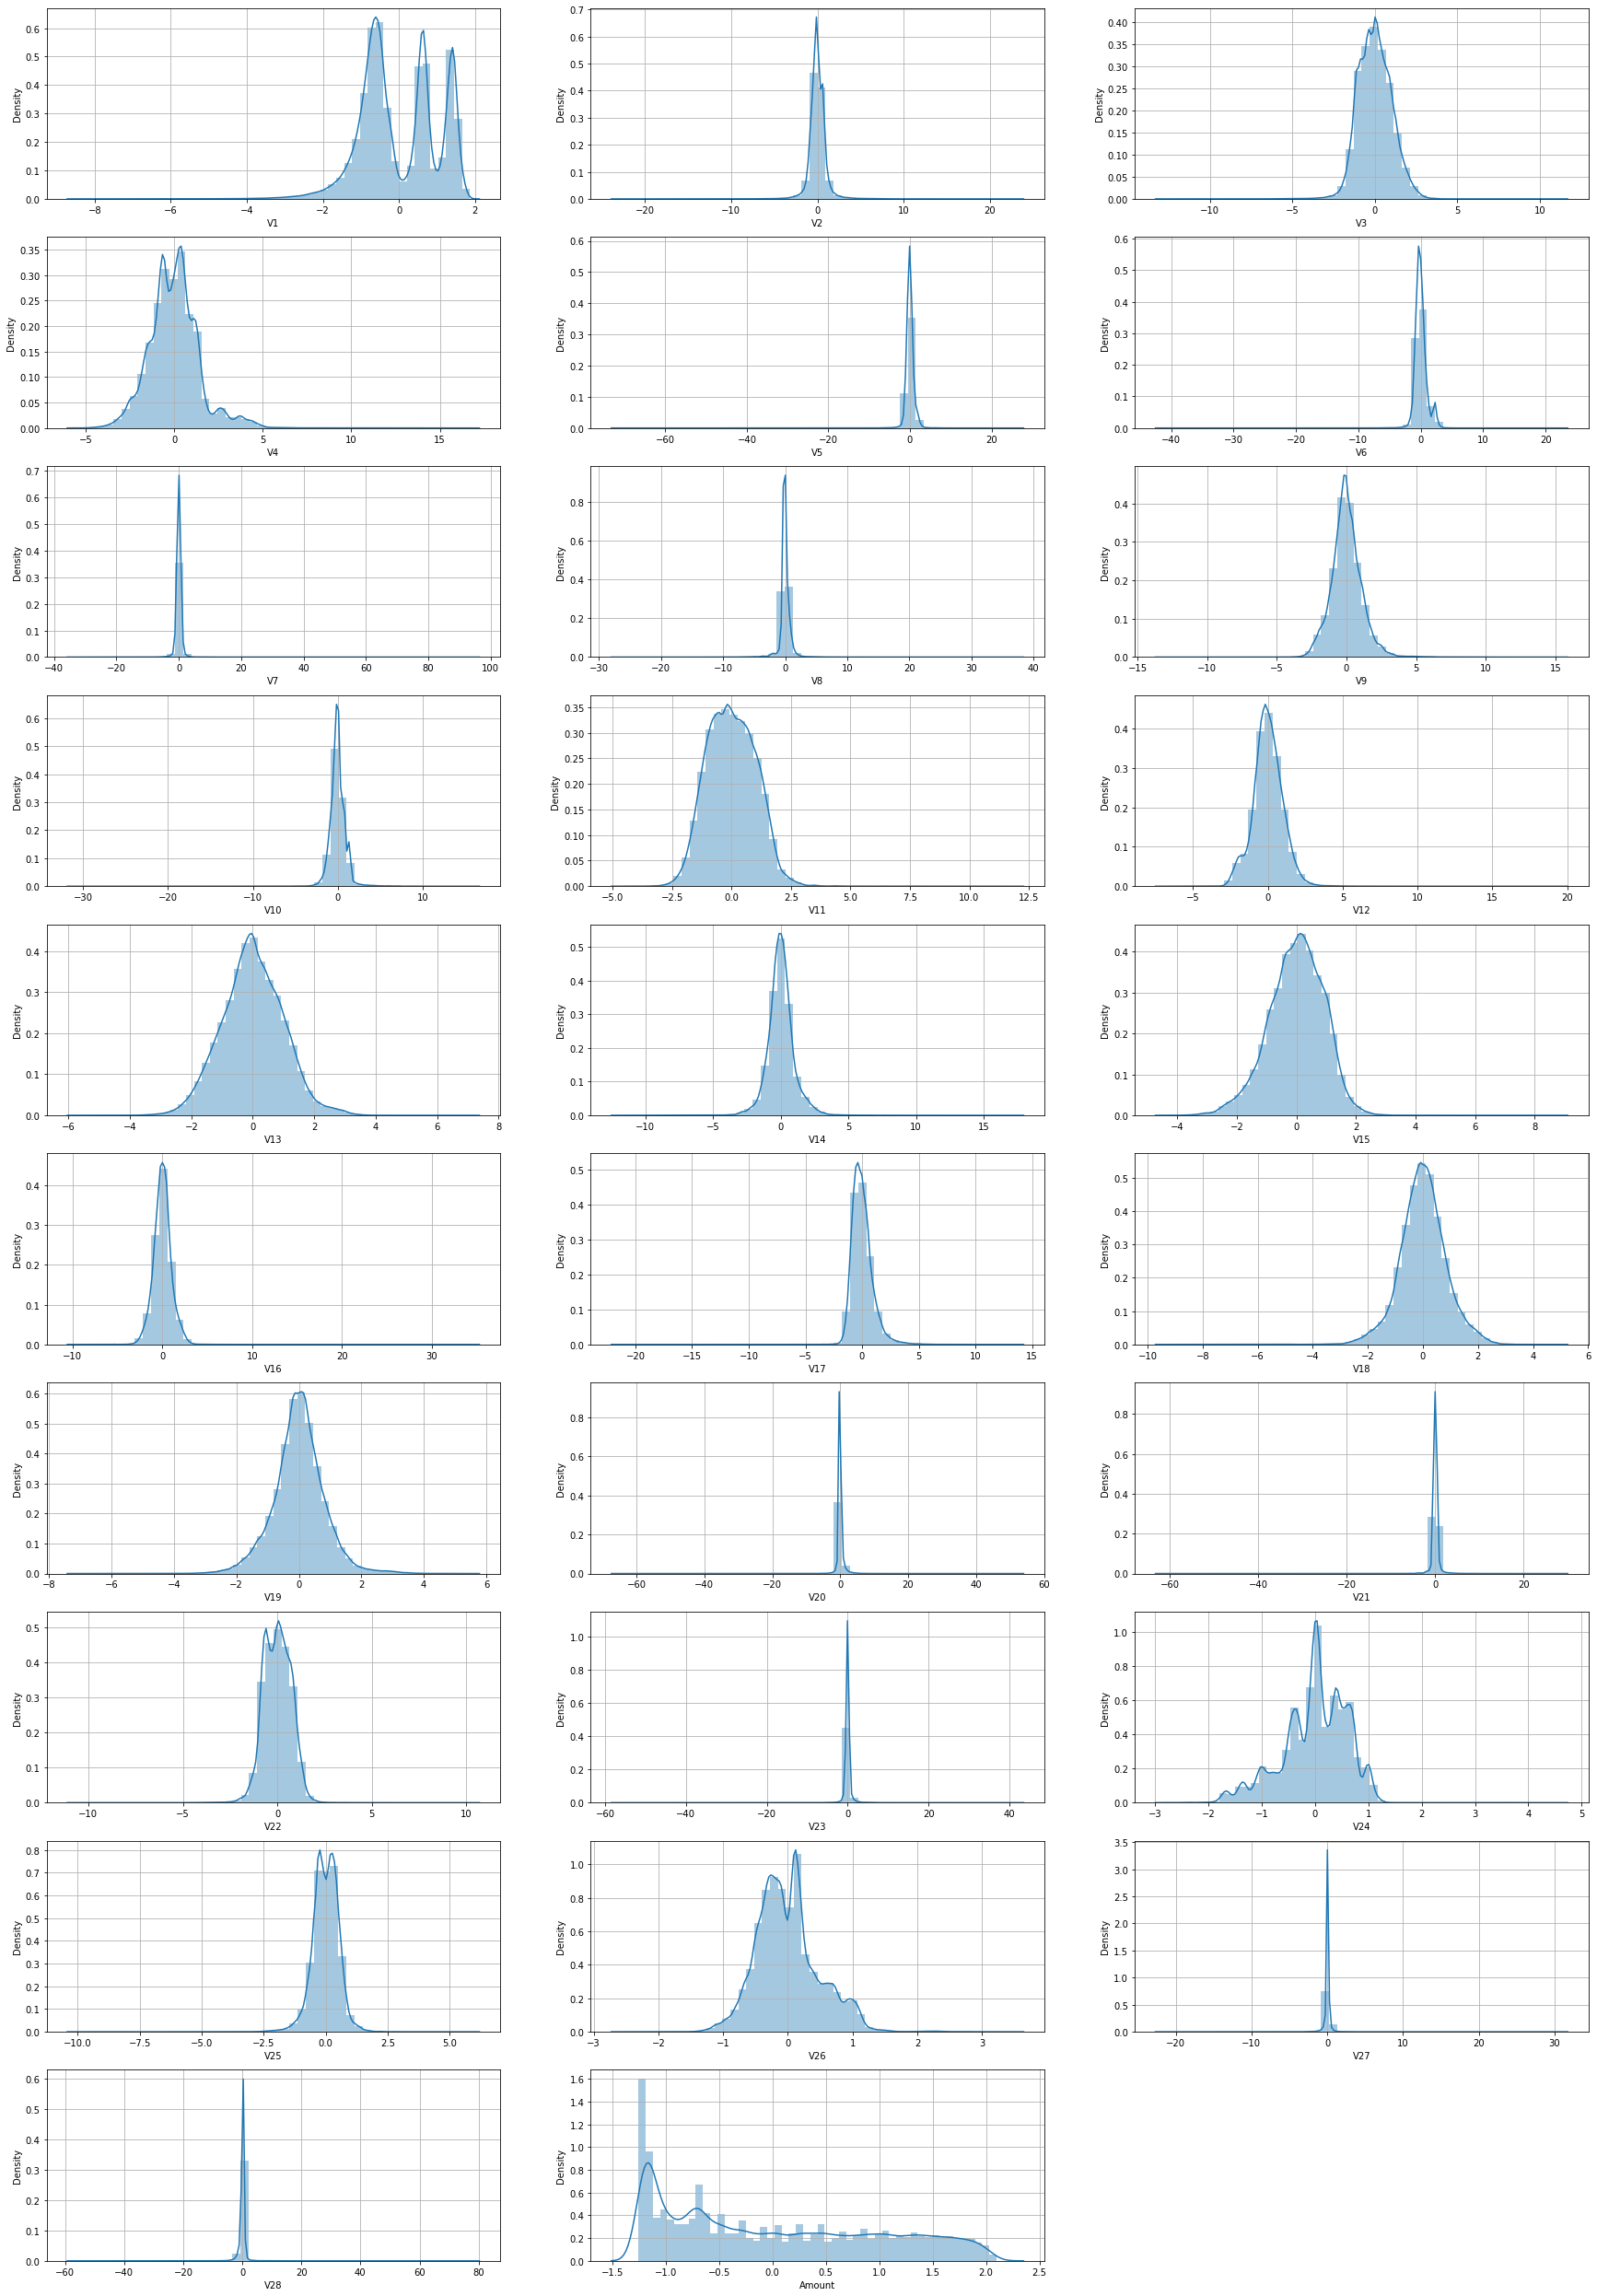

In [147]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X_train[col])
    plt.grid()

plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result
To build models on below mentioned algorithms and  will compare for the best model.  are not building models on SVM, and KNN as these algorithms are computationaly expensive and need more computational resources specially for the SVM and KNN. Skipped models' process is computationally very expensive when we have very large data set. We do not have these resource available so we are skipping these models. Working with below models: - Logistic Regression - Decision Tree - RandomForest - XGBoost

Metric selection on imbalance data
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

In [148]:

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

In [149]:
# Class imbalance
y_train.value_counts()/y_train.shape

0   0.998271
1   0.001729
Name: Class, dtype: float64

In [150]:
#perform cross validation

# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#perform hyperparameter tuning

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.981496303000539


In [151]:
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Best hyperparameters:  {'C': 0.01}


In [152]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.251658,0.164479,0.066569,0.006541,0.010000,{'C': 0.01},0.972104,0.962198,0.994864,0.991937,0.986380,0.981496,0.012427,1,0.985893,0.990098,0.982500,0.983586,0.984000,0.985215,0.002676
1,11.458056,0.196538,0.056069,0.004248,0.100000,{'C': 0.1},0.967953,0.958360,0.995753,0.990598,0.982545,0.979042,0.013970,2,0.984753,0.988026,0.980152,0.981293,0.982011,0.983247,0.002830
2,7.610284,3.521574,0.060910,0.010994,1,{'C': 1},0.966197,0.956946,0.995684,0.990137,0.981486,0.978090,0.014524,3,0.984144,0.987253,0.979338,0.980421,0.981279,0.982487,0.002867
3,5.247123,0.220695,0.092021,0.041615,10,{'C': 10},0.965984,0.956716,0.995669,0.990087,0.981365,0.977964,0.014608,4,0.984062,0.987152,0.979235,0.980307,0.981185,0.982388,0.002871
4,5.386807,0.525430,0.051435,0.009335,100,{'C': 100},0.965950,0.956692,0.995665,0.990080,0.981352,0.977948,0.014618,5,0.984053,0.987142,0.979225,0.980295,0.981176,0.982378,0.002871
5,3.845782,0.311715,0.033027,0.010945,1000,{'C': 1000},0.965946,0.956689,0.995665,0.990081,0.981351,0.977947,0.014619,6,0.984052,0.987140,0.979224,0.980294,0.981175,0.982377,0.002871


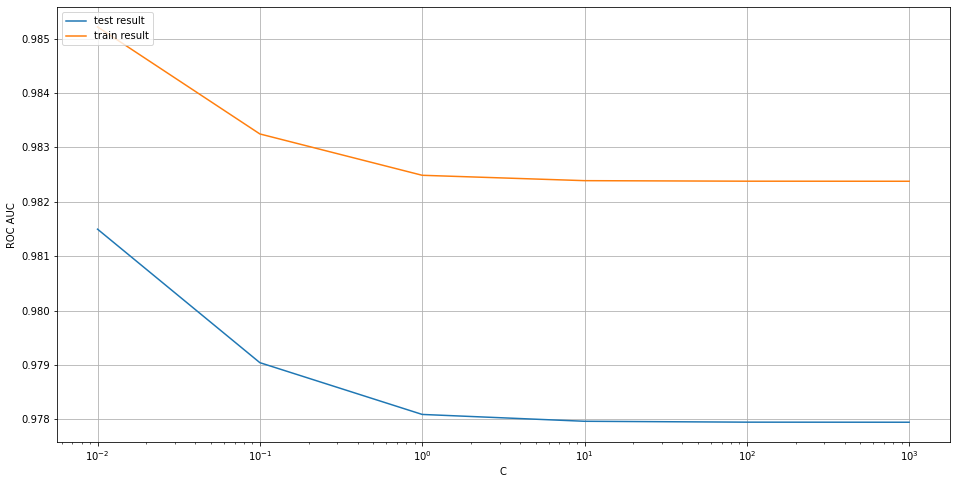

In [153]:
# plot of C versus train and validation scores
plt.figure(figsize=(16, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

### Logistic regression with Optimum C

In [154]:
 model_cv.best_params_

{'C': 0.01}

In [155]:
# Instantiating the model with best C
log_reg_imb_model = model_cv.best_estimator_

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

### Prediction and model evalution on the train set¶

In [156]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print("\n\n")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [157]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [158]:
display_scores(y_train, y_train_pred)

F1 Score: 74.47%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.91      0.63      0.74       394

    accuracy                           1.00    227845
   macro avg       0.96      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [159]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return Nonea


In [160]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

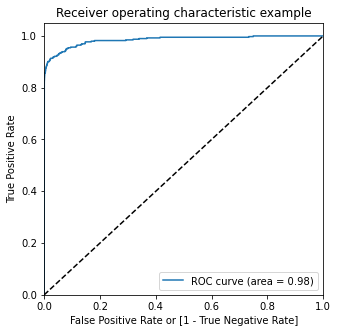

NameError: name 'Nonea' is not defined

In [161]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [162]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 72.83%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.64      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [163]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

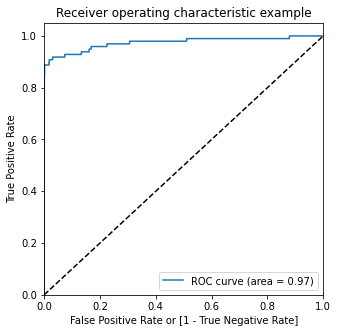

NameError: name 'Nonea' is not defined

In [164]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

can see very good ROC on the test data set 0.97.

#### Model Summary

- Train set
    -     ROC : 98%
    - F1 Score: 74.47%
    
    
- Test set
    -     ROC : 97%
    - F1 score: 72.83%

# Decision Tree

In [165]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [166]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.691146,0.071078,0.044706,0.006578,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.906562,0.960069,0.919108,0.938950,0.921807,0.929299,0.018530,5
1,8.745397,0.016653,0.035989,0.010991,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.906562,0.960068,0.919133,0.938949,0.934463,0.931835,0.018192,3
2,8.846181,0.092806,0.027491,0.007928,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.906370,0.964947,0.925538,0.939587,0.934553,0.934199,0.019100,1
3,9.352317,0.115638,0.037967,0.001706,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.906370,0.964947,0.925538,0.939587,0.934553,0.934199,0.019100,1
4,19.569719,0.284847,0.038008,0.006151,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.892739,0.940440,0.937976,0.951030,0.918459,0.928129,0.020586,7


In [167]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9341988405438404


In [168]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


#### Decision Tree with optimal hyperparameters

In [169]:
# Model with optimal hyperparameters
dt_imb_model = grid_search.best_estimator_

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)

#### Prediction on the train set

In [170]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 68.32%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.56      0.68       394

    accuracy                           1.00    227845
   macro avg       0.94      0.78      0.84    227845
weighted avg       1.00      1.00      1.00    227845



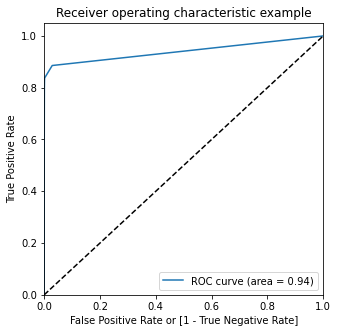

NameError: name 'Nonea' is not defined

In [171]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [172]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 61.73%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.51      0.62        98

    accuracy                           1.00     56962
   macro avg       0.89      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



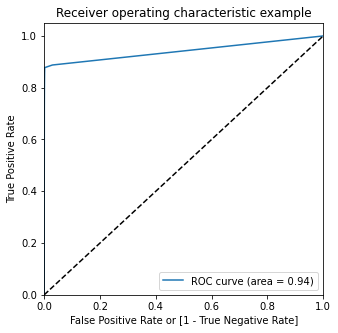

NameError: name 'Nonea' is not defined

In [173]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC Score: 94%
    - F1 score : 68.32%
    
    
- Test set
    - ROC Score: 94%
    - F1 score : 61.73%

# RandomForest

In [174]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [176]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,134.303494,0.206583,0.653414,0.037528,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.948079,0.989750,0.972898,0.957788,0.977922,0.969288,0.014754,5
1,134.377629,0.140158,0.619500,0.044484,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.948719,0.981090,0.975566,0.956613,0.974297,0.967257,0.012385,8
2,152.316093,14.873810,0.641748,0.017034,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.951975,0.981720,0.962758,0.969024,0.977117,0.968519,0.010539,7
3,164.469768,0.248386,0.630600,0.061267,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.945831,0.983487,0.978058,0.968532,0.970037,0.969189,0.012883,6
4,347.290650,1.590763,1.196369,0.125220,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.965083,0.984220,0.979026,0.969382,0.984458,0.976434,0.007878,3


In [177]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9769818881312693


In [178]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Random forest with optimal hyperparameters

In [182]:
# Model with optimal hyperparameters
rf_imb_model = grid_search.best_estimator_

rf_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

#### Prediction on the train set

In [183]:
y_train_pred = rf_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 68.92%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.57      0.69       394

    accuracy                           1.00    227845
   macro avg       0.94      0.78      0.84    227845
weighted avg       1.00      1.00      1.00    227845



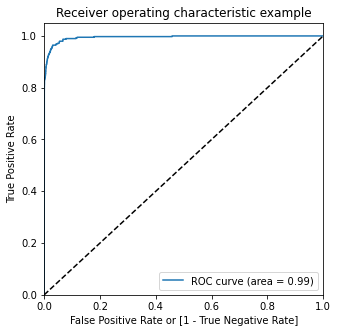

NameError: name 'Nonea' is not defined

In [184]:
# Predicted probability
y_train_pred_proba = rf_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [185]:
#### Evaluating the model on the test set

In [186]:
y_test_pred = rf_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 67.07%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.57      0.67        98

    accuracy                           1.00     56962
   macro avg       0.91      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



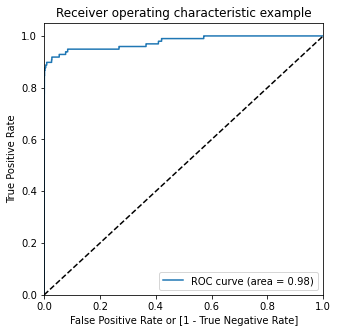

NameError: name 'Nonea' is not defined

In [187]:
# Predicted probability
y_test_pred_proba = rf_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC Score: 99%
    - F1 score : 68.92%
    
    
- Test set
    - ROC Score: 98%
    - F1 score : 69.01%

# XGBoost

In [188]:
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None

In [189]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.875345,0.037368,0.209850,0.001813,0.200000,0.300000,"{'learning_rate': 0.2, 'subsample': 0.3}",0.971420,0.985576,0.981679,0.970842,0.992326,0.980369,0.008278,3,0.999702,0.998996,0.999668,0.999728,0.999252,0.999469,0.000294
1,8.895907,0.056618,0.205640,0.002513,0.200000,0.600000,"{'learning_rate': 0.2, 'subsample': 0.6}",0.967882,0.982007,0.988716,0.976787,0.993674,0.981813,0.009030,2,0.999907,0.999810,0.999835,0.999848,0.999759,0.999832,0.000048
2,8.976989,0.329974,0.247922,0.039021,0.200000,0.900000,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978754,0.984375,0.987226,0.975895,0.992198,0.983690,0.005839,1,0.999781,0.999677,0.999753,0.999764,0.999782,0.999751,0.000039
3,10.406546,0.158447,0.255600,0.018748,0.600000,0.300000,"{'learning_rate': 0.6, 'subsample': 0.3}",0.945012,0.981722,0.973338,0.954357,0.976459,0.966178,0.014045,6,0.999978,0.999978,0.999941,0.999993,0.999891,0.999956,0.000037
4,10.253936,1.051941,0.242049,0.042455,0.600000,0.600000,"{'learning_rate': 0.6, 'subsample': 0.6}",0.953561,0.984589,0.978503,0.966033,0.984145,0.973366,0.011954,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [190]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)

Best roc auc score :  0.9836895675182971


In [191]:
print(model_cv.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [192]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

#### XGBoost model with optimal hyperparameter

In [193]:
# fit model on training data
xgb_imb_model = model_cv.best_estimator_
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Model evaluation on train set

In [194]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 91.37%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.97      0.86      0.91       394

    accuracy                           1.00    227845
   macro avg       0.99      0.93      0.96    227845
weighted avg       1.00      1.00      1.00    227845



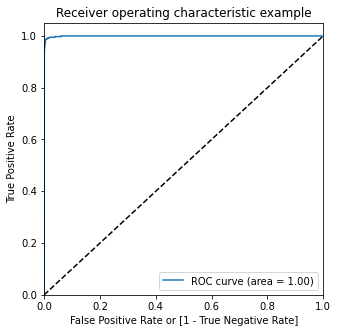

NameError: name 'Nonea' is not defined

In [195]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Evaluating the model on the test set

In [196]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 85.87%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



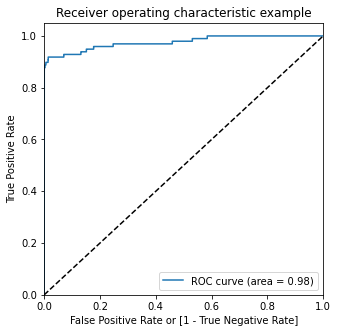

NameError: name 'Nonea' is not defined

In [197]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

- Train set
    - ROC score: 100%
    - F1 score: 91.37%
- Test set
    - ROC score: 98%
    - F1 score: 85.87%

**XGBoost model is giving good performance on the unbalanced data among these 4 models. ROC-AUC score on the train data is 100% and on test data 98%.**

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [198]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
print('4th Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-4])+1)
print('5th Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-5])+1)

Top var = 10
2nd Top var = 14
3rd Top var = 17
4th Top var = 12
5th Top var = 7


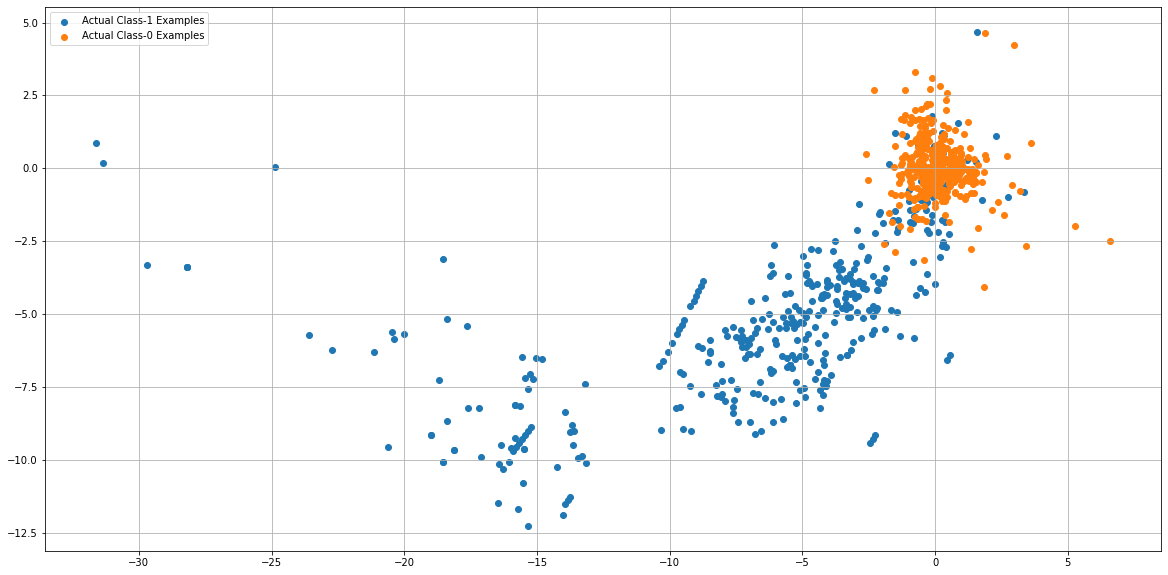

In [199]:
# Variable on Index-10 and Index-14 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.grid()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [200]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))

Train auc = 0.9995144042515588


In [201]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.0073485253


We can see that the threshold is 0.007, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [202]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
#fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_over.shape, y_over.shape

((454902, 29), (454902,))

In [203]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))

Before sampling class distribution:- Counter({0: 227451, 1: 394})


In [204]:
# new class distribution 
print('New class distribution:-',Counter(y_over))

New class distribution:- Counter({0: 227451, 1: 227451})


## Model Building
- Build different models on the balanced dataset and see the result

# Logistic Regression with Random Oversampling

In [206]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9884536908632656


In [207]:
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Best hyperparameters:  {'C': 1000}


In [208]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.542996,0.153803,0.144898,0.029237,0.010000,{'C': 0.01},0.988103,0.988019,0.988357,0.988532,0.988595,0.988321,0.000228,6,0.988380,0.988422,0.988305,0.988336,0.988212,0.988331,0.000072
1,17.952308,0.314896,0.110382,0.014595,0.100000,{'C': 0.1},0.988225,0.988139,0.988481,0.988631,0.988718,0.988439,0.000225,5,0.988495,0.988545,0.988424,0.988461,0.988330,0.988451,0.000073
2,14.095703,2.915626,0.121651,0.016549,1,{'C': 1},0.988236,0.988155,0.988495,0.988642,0.988732,0.988452,0.000224,4,0.988509,0.988559,0.988436,0.988475,0.988342,0.988464,0.000073
3,11.943236,0.279130,0.103938,0.020451,10,{'C': 10},0.988237,0.988157,0.988496,0.988643,0.988734,0.988453,0.000224,3,0.988510,0.988560,0.988437,0.988476,0.988343,0.988465,0.000073
4,10.268070,3.557717,0.066735,0.016937,100,{'C': 100},0.988237,0.988157,0.988496,0.988643,0.988734,0.988454,0.000224,2,0.988510,0.988560,0.988438,0.988476,0.988344,0.988466,0.000073


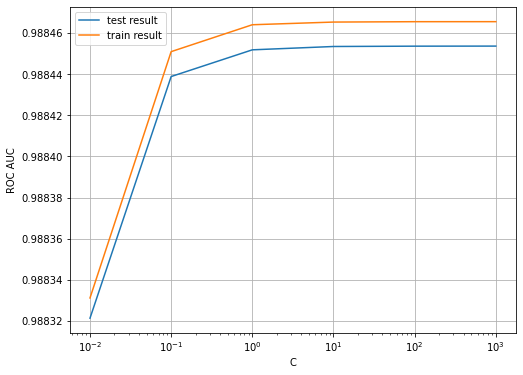

In [209]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

#### Logistic Regression with hyperparameter tuning

In [212]:
model_cv.best_params_

{'C': 1000}

In [213]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

#### Evaluating the model on train data

In [215]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [216]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 94.97%



Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



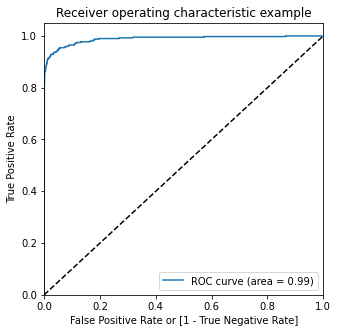

NameError: name 'Nonea' is not defined

In [217]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating on test data

In [218]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.11%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



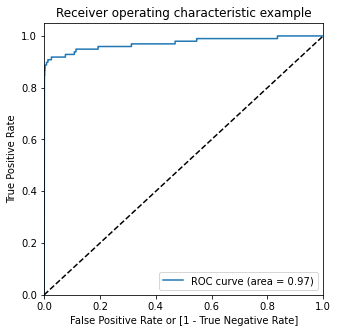

NameError: name 'Nonea' is not defined

In [219]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 94.97%
- Test set
    - ROC score : 97%
    - F1 score: 10.11%

# Decision Tree with Random Oversampling

In [221]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [222]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9994349929126436


In [223]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [224]:
#### Decision Tree with optimal hyperparameters

In [225]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [226]:
#### Model evatuation on train data

In [227]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.64%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



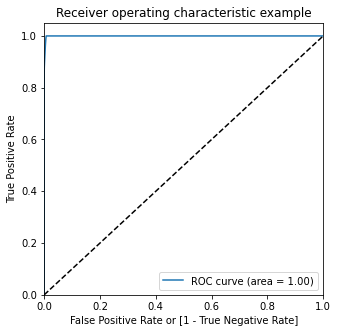

NameError: name 'Nonea' is not defined

In [228]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [229]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 25.59%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.83      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.63     56962
weighted avg       1.00      0.99      0.99     56962



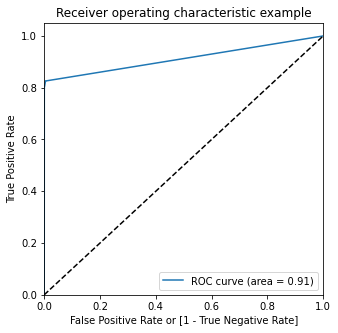

NameError: name 'Nonea' is not defined

In [230]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.64%
- Test set
    - ROC score : 91%
    - F1 score: 25.59%

# Random Forest with Random Oversampling

In [232]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [233]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9999447589719361


#### Random Forest with optimal hyperparameters

In [234]:
# Model with optimal hyperparameters
rf_over_model = grid_search.best_estimator_

rf_over_model.fit(X_over, y_over)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)

#### Model evatuation on train data

In [235]:
# Predictions on the train set
y_train_pred = rf_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.85%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



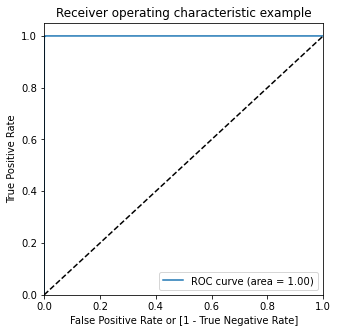

NameError: name 'Nonea' is not defined

In [236]:
# Predicted probability
y_train_pred_proba = rf_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [237]:
# Evaluating model on the test data
y_test_pred = rf_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.9%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.60      0.89      0.72        98

    accuracy                           1.00     56962
   macro avg       0.80      0.94      0.86     56962
weighted avg       1.00      1.00      1.00     56962



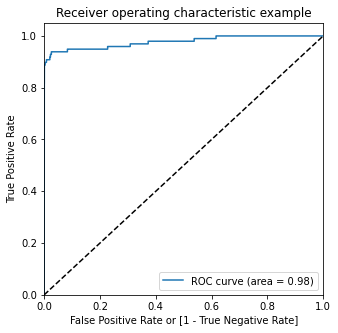

NameError: name 'Nonea' is not defined

In [238]:
# Predicted probability
y_test_pred_proba = rf_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.85%
- Test set
    - ROC score : 98%
    - F1 score: 71.9%

# XGBoost with Random Oversampling

In [239]:
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None

In [240]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.241019,0.114964,0.548585,0.024739,0.200000,0.300000,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999864,0.999857,0.999839,0.999901,0.999884,0.999869,0.000021,5,0.999865,0.999889,0.999895,0.999880,0.999894,0.999885,0.000011
1,22.266354,0.140629,0.550759,0.025274,0.200000,0.600000,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999901,0.999873,0.999820,0.999886,0.999892,0.999875,0.000029,4,0.999887,0.999894,0.999876,0.999872,0.999889,0.999884,0.000008
2,21.287804,0.559538,0.534780,0.041255,0.200000,0.900000,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999872,0.999858,0.999823,0.999880,0.999883,0.999863,0.000022,6,0.999865,0.999871,0.999877,0.999875,0.999885,0.999875,0.000007
3,22.071717,0.155060,0.522801,0.033349,0.600000,0.300000,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999991,0.999986,0.999977,0.999988,0.999987,0.999986,0.000005,3,0.999997,0.999994,0.999996,0.999998,0.999999,0.999997,0.000002
4,21.140439,2.635020,0.489502,0.110426,0.600000,0.600000,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999998,0.999990,0.999984,0.999988,0.999982,0.999988,0.000006,1,0.999999,0.999993,0.999998,0.999997,0.999995,0.999996,0.000002
5,14.657968,0.189492,0.241620,0.006392,0.600000,0.900000,"{'learning_rate': 0.6, 'subsample': 0.9}",1.000000,0.999979,0.999973,0.999992,0.999995,0.999988,0.000010,2,0.999997,0.999997,0.999999,0.999994,0.999999,0.999997,0.000002


In [241]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)

Best roc auc score :  0.999988460528043


In [242]:
print(model_cv.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [243]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

#### XGBoost with optimal hyperparameter

In [244]:
# fit model on training data
xgb_over_model = model_cv.best_estimator_
xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Model evatuation on train data

In [245]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 99.99%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



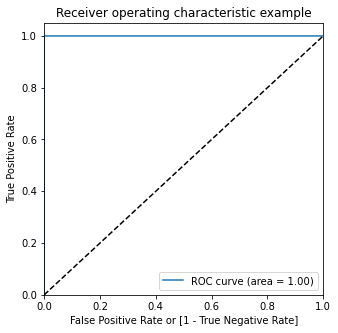

NameError: name 'Nonea' is not defined

In [246]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Model evaluation on the test set

In [247]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 76.71%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.86      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962



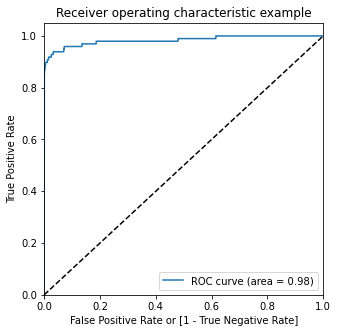

NameError: name 'Nonea' is not defined

In [248]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 99.99%
- Test set
    - ROC score : 98%
    - F1 score: 76.71%

## SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distribution after applying SMOTE 

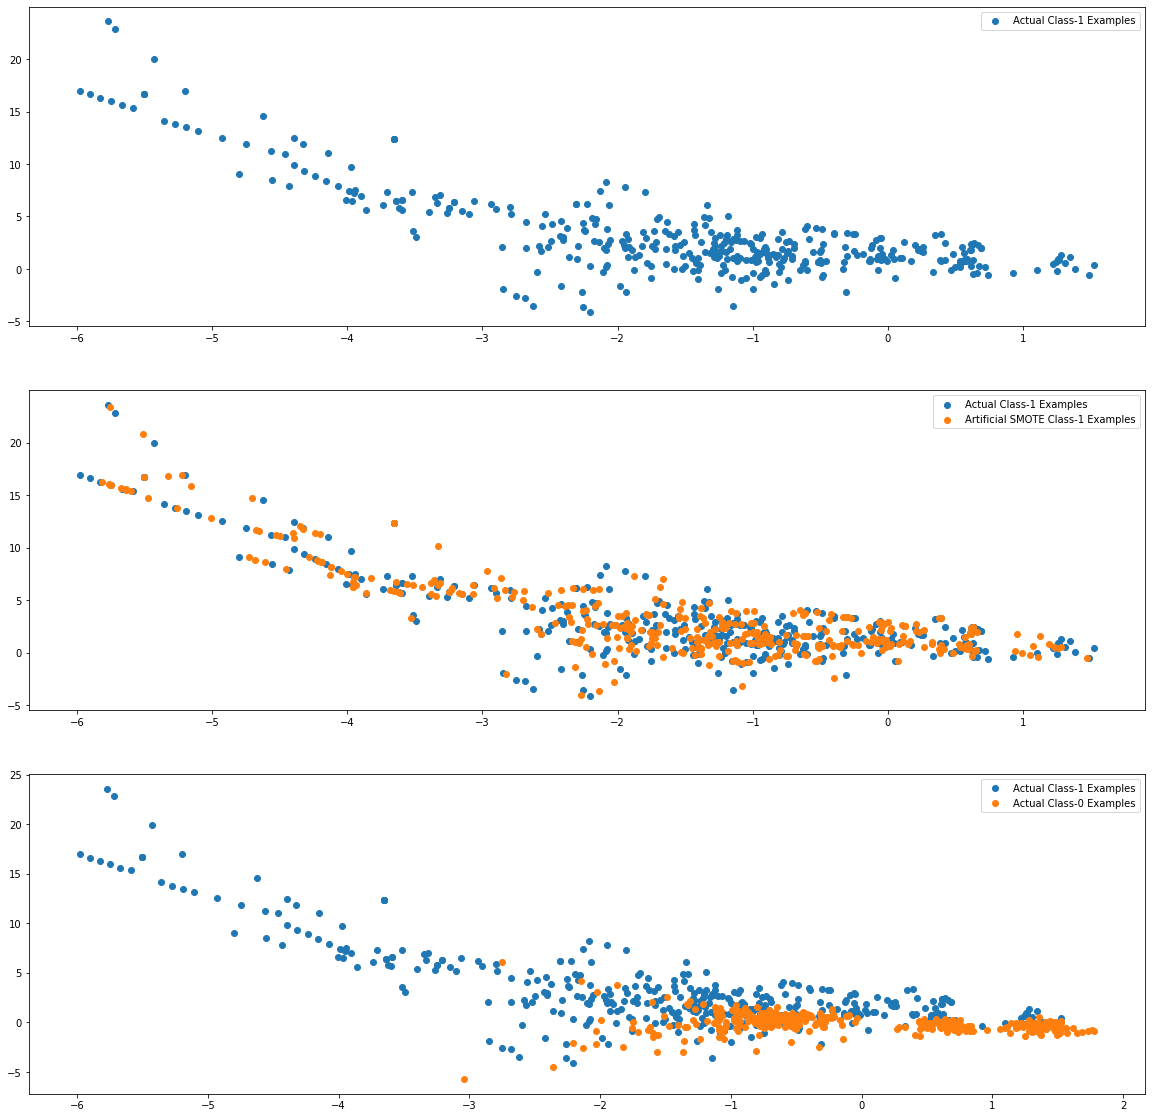

In [249]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Logistic Regression on balanced data with SMOTE

In [250]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9905170338216054


In [251]:
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Best hyperparameters:  {'C': 100}


In [252]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.474374,0.268926,0.236220,0.035606,0.010000,{'C': 0.01},0.990497,0.990417,0.990399,0.990272,0.990450,0.990407,0.000075,6,0.990374,0.990406,0.990410,0.990492,0.990405,0.990417,0.000039
1,17.444521,1.408753,0.253624,0.055684,0.100000,{'C': 0.1},0.990582,0.990526,0.990491,0.990375,0.990552,0.990505,0.000072,5,0.990472,0.990502,0.990511,0.990592,0.990502,0.990516,0.000040
2,12.289006,4.309095,0.174371,0.051971,1,{'C': 1},0.990590,0.990537,0.990502,0.990387,0.990564,0.990516,0.000071,4,0.990483,0.990512,0.990522,0.990603,0.990512,0.990526,0.000040
3,10.433471,1.006465,0.239406,0.097477,10,{'C': 10},0.990591,0.990539,0.990503,0.990388,0.990565,0.990517,0.000071,3,0.990484,0.990513,0.990523,0.990604,0.990513,0.990527,0.000040
4,10.562618,0.890167,0.234757,0.054938,100,{'C': 100},0.990591,0.990539,0.990503,0.990388,0.990565,0.990517,0.000071,1,0.990484,0.990513,0.990523,0.990604,0.990513,0.990528,0.000040


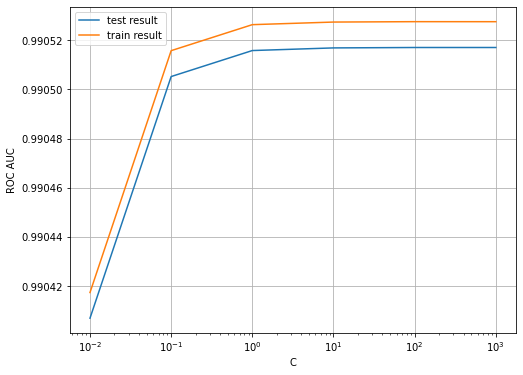

In [253]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

#### Logistic Regression with optimal C

In [254]:
# Printing best params
model_cv.best_params_

{'C': 100}

In [255]:
# Instantiating the model
logreg_smote_model = model_cv.best_estimator_

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

#### Evaluating the model on train data

In [256]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.8%



Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



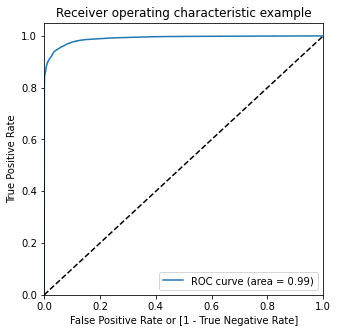

NameError: name 'Nonea' is not defined

In [257]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

#### Evaluating on test data

In [258]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.67%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



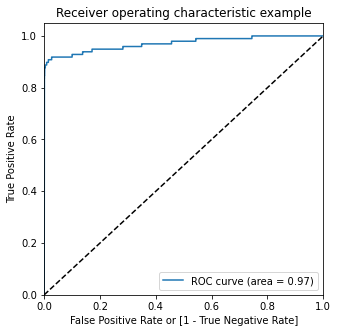

NameError: name 'Nonea' is not defined

In [259]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

#### Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 94.8%
    
    
- Test set
    - ROC score : 97%
    - F1 score: 9.67%

# Decision Tree on balanced data with SMOTE

In [260]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [261]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9984771318203439


In [262]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [263]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [264]:
# Model with optimal hyperparameters
dt_smote_model = grid_search.best_estimator_

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

In [265]:
#### Evaluating the model on train data

In [266]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.93%



Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



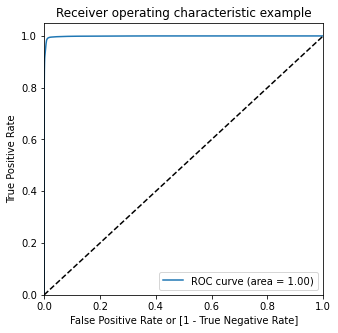

NameError: name 'Nonea' is not defined

In [267]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [268]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 17.39%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.90      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.99      0.99     56962



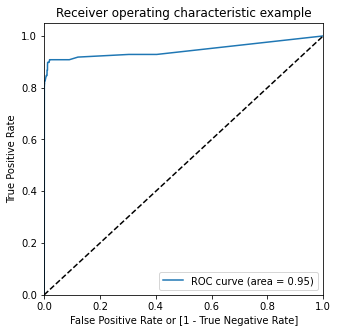

NameError: name 'Nonea' is not defined

In [269]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 98.93%
- Test set
    - ROC score : 95%
    - F1 score: 17.39%

# Randomforest on balanced data with SMOTE

In [270]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [271]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.999535204522567


In [272]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [274]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [275]:
# Model with optimal hyperparameters
rf_smote_model = grid_search.best_estimator_

rf_smote_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

#### Evaluating the model on train data

In [276]:
# Predictions on the train set
y_train_pred_smote = rf_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.92%



Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    227451
           1       1.00      0.98      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



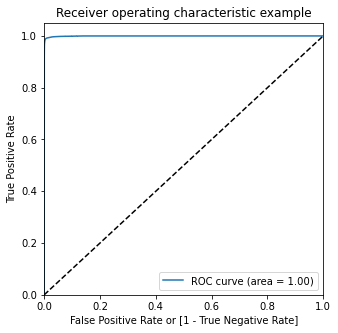

NameError: name 'Nonea' is not defined

In [277]:
# Predicted probability
y_train_pred_proba = rf_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [278]:
# Evaluating model on the test data
y_pred = rf_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 53.01%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.90      0.53        98

    accuracy                           1.00     56962
   macro avg       0.69      0.95      0.76     56962
weighted avg       1.00      1.00      1.00     56962



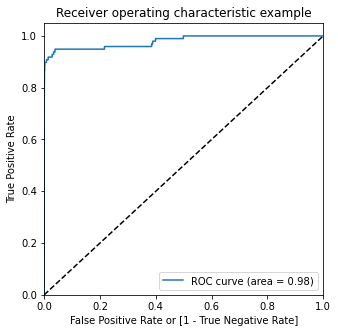

NameError: name 'Nonea' is not defined

In [279]:
# Predicted probability
y_test_pred_smote = rf_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 98.92%
- Test set
    - ROC score : 98%
    - F1 score: 53.01%

# XGBoost on balanced data with SMOTE

In [280]:
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None

In [281]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,20.159178,0.078891,0.550197,0.012936,0.200000,0.300000,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999619,0.999543,0.999512,0.999602,0.999560,0.999567,0.000039,5,0.999618,0.999560,0.999602,0.999601,0.999577,0.999591,0.000020
1,20.295277,0.072109,0.530434,0.007984,0.200000,0.600000,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999584,0.999581,0.999520,0.999616,0.999561,0.999572,0.000032,4,0.999594,0.999610,0.999597,0.999602,0.999597,0.999600,0.000006
2,22.006488,1.719836,0.522194,0.036780,0.200000,0.900000,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999536,0.999585,0.999514,0.999573,0.999541,0.999550,0.000026,6,0.999558,0.999604,0.999592,0.999574,0.999565,0.999579,0.000017
3,24.046230,0.180747,0.537776,0.035054,0.600000,0.300000,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999948,0.999943,0.999904,0.999952,0.999934,0.999936,0.000017,3,0.999954,0.999964,0.999963,0.999966,0.999960,0.999961,0.000004
4,22.720505,3.357262,0.443911,0.026700,0.600000,0.600000,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999962,0.999938,0.999913,0.999944,0.999933,0.999938,0.000016,2,0.999967,0.999955,0.999969,0.999965,0.999961,0.999963,0.000005
5,15.248263,0.132178,0.383242,0.027142,0.600000,0.900000,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999958,0.999939,0.999941,0.999953,0.999927,0.999944,0.000011,1,0.999956,0.999968,0.999971,0.999973,0.999959,0.999965,0.000007


In [282]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)

Best roc auc score :  0.9999435260736084


In [283]:
print(model_cv.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [284]:
#### Model with optimal hyperparameter

In [285]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [286]:
# fit model on training data
xgb_smote_model = model_cv.best_estimator_
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [287]:
#### Evaluating the model on the train data

In [288]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 99.88%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



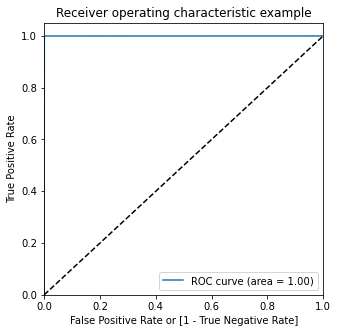

NameError: name 'Nonea' is not defined

In [289]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on test data

In [290]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 49.13%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.87      0.49        98

    accuracy                           1.00     56962
   macro avg       0.67      0.93      0.74     56962
weighted avg       1.00      1.00      1.00     56962



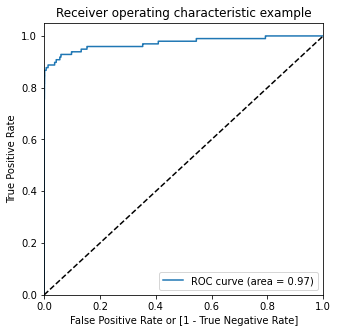

NameError: name 'Nonea' is not defined

In [291]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 99.88%
    
- Test set
    - ROC score : 97%
    - F1 score: 49.13%

## ADASYN (Adaptive Synthetic Sampling)

### Print the class distribution after applying ADASYN

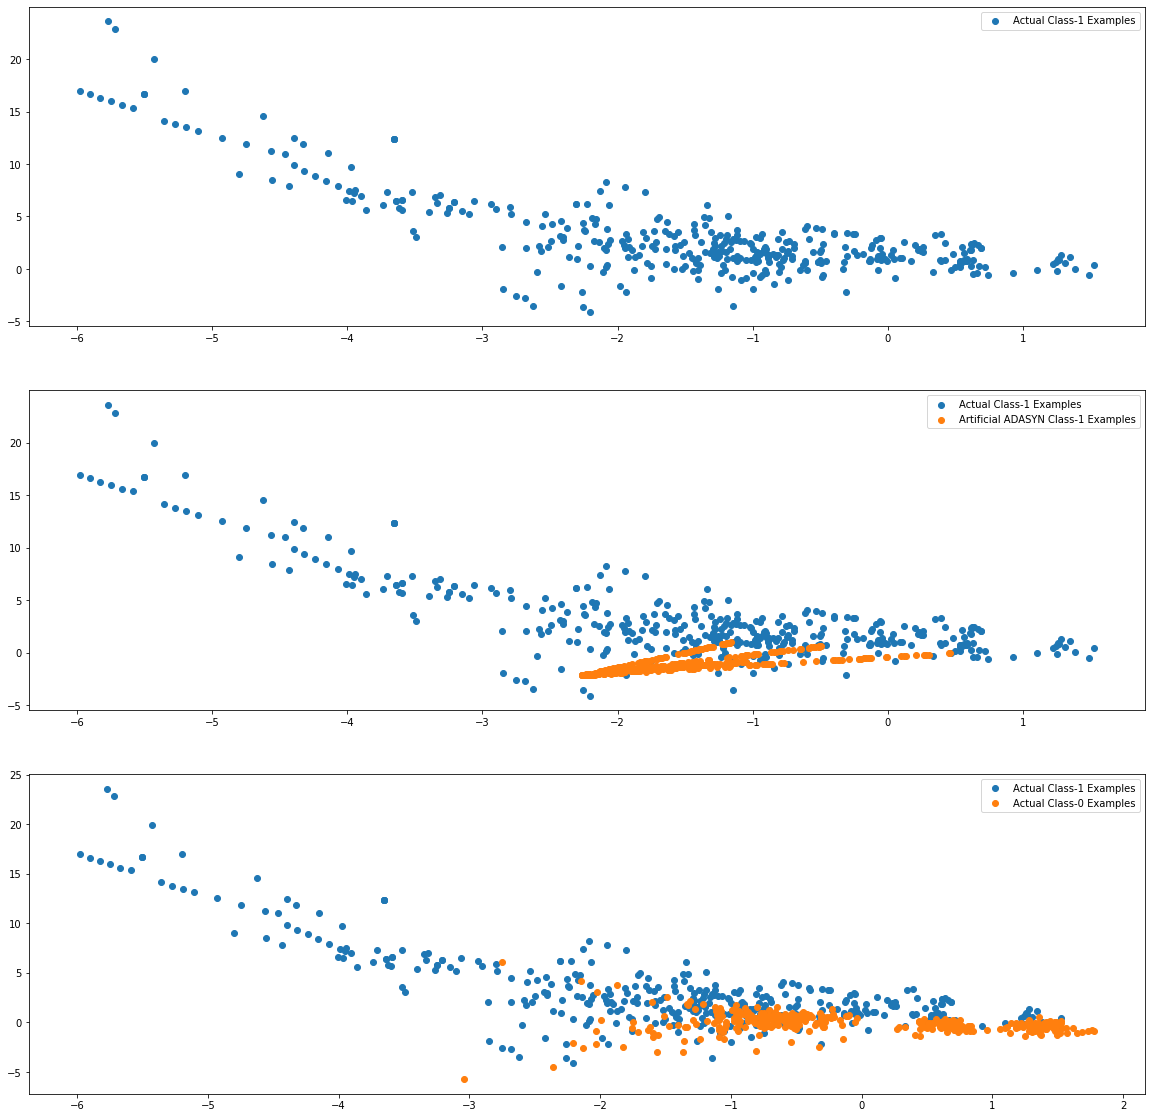

In [293]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Logistic Regression on balanced data with ADASYN

In [294]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9666456444374851


In [295]:
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Best hyperparameters:  {'C': 1000}


In [296]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.619064,0.127851,0.032878,0.001783,0.010000,{'C': 0.01},0.966139,0.965901,0.966834,0.966914,0.966385,0.966435,0.000391,6,0.966472,0.966662,0.966327,0.966458,0.966386,0.966461,0.000113
1,1.696003,0.076639,0.040225,0.011339,0.100000,{'C': 0.1},0.966357,0.966053,0.967034,0.967072,0.966620,0.966627,0.000391,5,0.966676,0.966845,0.966514,0.966650,0.966583,0.966654,0.000111
2,1.791801,0.139430,0.035613,0.004435,1,{'C': 1},0.966379,0.966064,0.967051,0.967084,0.966642,0.966644,0.000392,4,0.966694,0.966861,0.966530,0.966666,0.966600,0.966670,0.000111
3,1.881847,0.293776,0.043131,0.023481,10,{'C': 10},0.966381,0.966065,0.967053,0.967085,0.966644,0.966645,0.000392,3,0.966696,0.966862,0.966531,0.966668,0.966602,0.966672,0.000111
4,1.968869,0.298612,0.038085,0.006848,100,{'C': 100},0.966381,0.966065,0.967053,0.967085,0.966645,0.966646,0.000392,2,0.966696,0.966862,0.966532,0.966668,0.966602,0.966672,0.000111


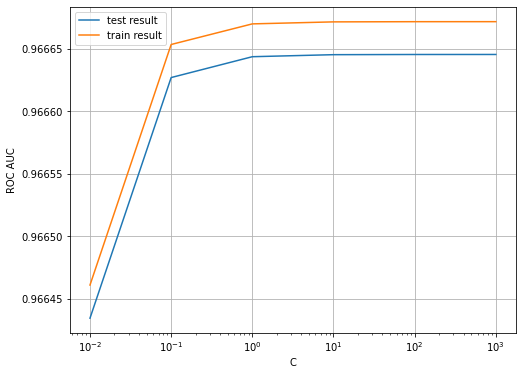

In [297]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.grid()

#### Logistic Regression with optimal C

In [298]:
model_cv.best_params_

{'C': 1000}

In [299]:
# Instantiating the model
logreg_adasyn_model = model_cv.best_estimator_

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

#### Evaluating the model with train data

In [301]:
# Evaluating on train data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 90.49%



Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91    227451
           1       0.91      0.90      0.90    227446

    accuracy                           0.91    454897
   macro avg       0.91      0.91      0.91    454897
weighted avg       0.91      0.91      0.91    454897



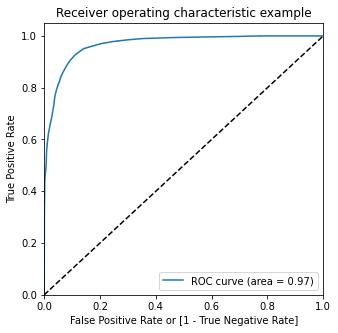

NameError: name 'Nonea' is not defined

In [302]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating on test data

In [307]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.39%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



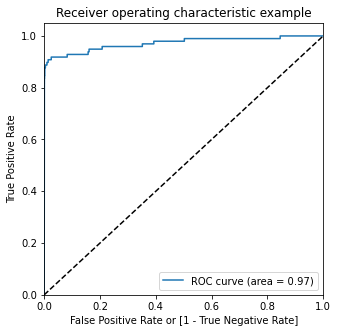

NameError: name 'Nonea' is not defined

In [304]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 97%
    - F1 score: 90.49%
- Test set
    - ROC score : 97%
    - F1 score: 3.39%

# Decision Tree on balanced data with ADASYN

In [309]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [310]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9416446452417286


In [311]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Model with optimal hyperparameters

In [312]:
# Model with optimal hyperparameters
dt_adasyn_model =grid_search.best_estimator_
dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

#### Evaluating the model on train data

In [314]:
# Evaluating model on the train data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 98.0%



Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    227451
           1       0.97      0.99      0.98    227446

    accuracy                           0.98    454897
   macro avg       0.98      0.98      0.98    454897
weighted avg       0.98      0.98      0.98    454897



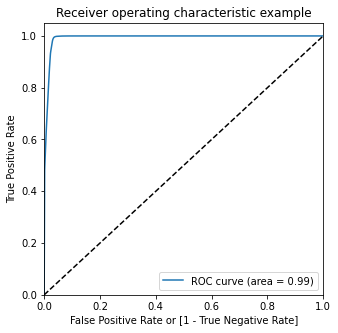

NameError: name 'Nonea' is not defined

In [315]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [316]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 7.65%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.87      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.96      0.98     56962



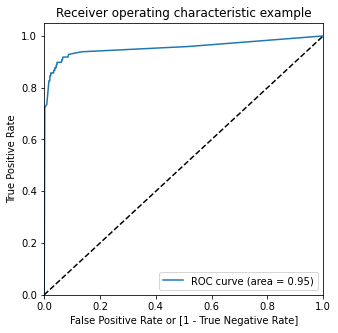

NameError: name 'Nonea' is not defined

In [317]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 99%
    - F1 score: 98%
    
- Test set
    - ROC score : 95%
    - F1 score: 7.65%

# RandomForest on balanced data with ADASYN

In [318]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [319]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.990604713527939


In [320]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [321]:
# Model with optimal hyperparameters
rf_adasyn_model =grid_search.best_estimator_
rf_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

#### Evaluating the model on train data

In [324]:
# Evaluating model on the train data
y_train_pred = rf_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.05%



Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227446

    accuracy                           0.99    454897
   macro avg       0.99      0.99      0.99    454897
weighted avg       0.99      0.99      0.99    454897



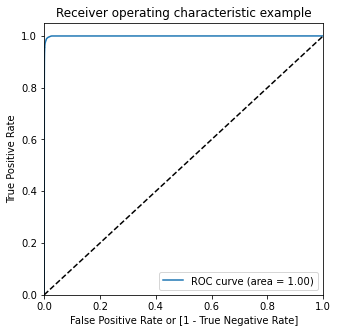

NameError: name 'Nonea' is not defined

In [325]:
# Predicted probability
y_train_pred_proba = rf_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [326]:
# Evaluating model on the test data
y_pred = rf_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 20.27%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.91      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962



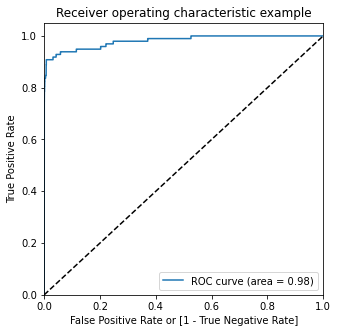

NameError: name 'Nonea' is not defined

In [327]:
# Predicted probability
y_test_pred_proba = rf_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 99.05%
    
- Test set
    - ROC score : 98%
    - F1 score: 20.27%

# XGBoost on balanced data with ADASYN

In [329]:
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None

In [330]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.801786,0.138030,0.490505,0.010476,0.200000,0.300000,"{'learning_rate': 0.2, 'subsample': 0.3}",0.978177,0.977207,0.994092,0.995527,0.996986,0.988398,0.008794,6,0.999048,0.999043,0.998784,0.998727,0.998681,0.998857,0.000158
1,21.762547,0.105839,0.487253,0.007529,0.200000,0.600000,"{'learning_rate': 0.2, 'subsample': 0.6}",0.980145,0.977084,0.993821,0.996151,0.997380,0.988916,0.008544,5,0.999124,0.999029,0.998805,0.998823,0.998586,0.998873,0.000188
2,19.890909,1.182736,0.546323,0.015490,0.200000,0.900000,"{'learning_rate': 0.2, 'subsample': 0.9}",0.980798,0.980403,0.993879,0.995554,0.997377,0.989602,0.007434,4,0.999046,0.998935,0.998915,0.998613,0.998711,0.998844,0.000158
3,19.762620,0.102183,0.451581,0.015162,0.600000,0.300000,"{'learning_rate': 0.6, 'subsample': 0.3}",0.984811,0.986080,0.997861,0.999157,0.999223,0.993426,0.006547,1,0.999909,0.999902,0.999884,0.999895,0.999873,0.999893,0.000013
4,18.507575,2.984831,0.412828,0.035799,0.600000,0.600000,"{'learning_rate': 0.6, 'subsample': 0.6}",0.987798,0.982724,0.994861,0.999170,0.998595,0.992630,0.006400,2,0.999897,0.999914,0.999897,0.999903,0.999839,0.999890,0.000026


In [331]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)

Best roc auc score :  0.9934261580752628


In [332]:
print(model_cv.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [333]:
# Model with optimal hyperparameter
xgb_adasyn_model = model_cv.best_estimator_
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Evaluating the model on the train data

In [335]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.78%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227446

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



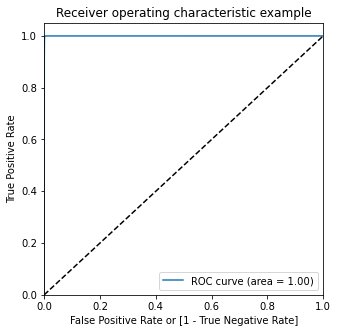

NameError: name 'Nonea' is not defined

In [336]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on test data

In [337]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 32.93%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.83      0.33        98

    accuracy                           0.99     56962
   macro avg       0.60      0.91      0.66     56962
weighted avg       1.00      0.99      1.00     56962



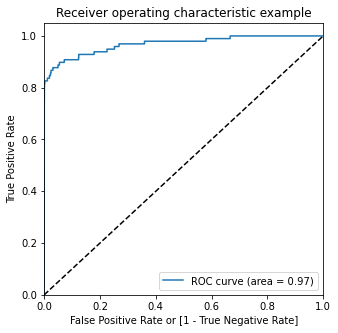

NameError: name 'Nonea' is not defined

In [338]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 99.78%
- Test set
    - ROC score : 97%
    - F1 score: 32.93%

### Select the oversampling method which shows the best result on a model
We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, decision tree, random forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the  dataset which is balanced with AdaSyn technique. We got ROC score 100% on train data and 97% on the test data and F1 score 99.78% on train data and 32.93% in the test data. 

Hence, we conclude that the `XGBoost model with Adasyn` is the best model.

### Print the important features of the best model to understand the dataset

In [340]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

Top var = 14
2nd Top var = 4
3rd Top var = 20


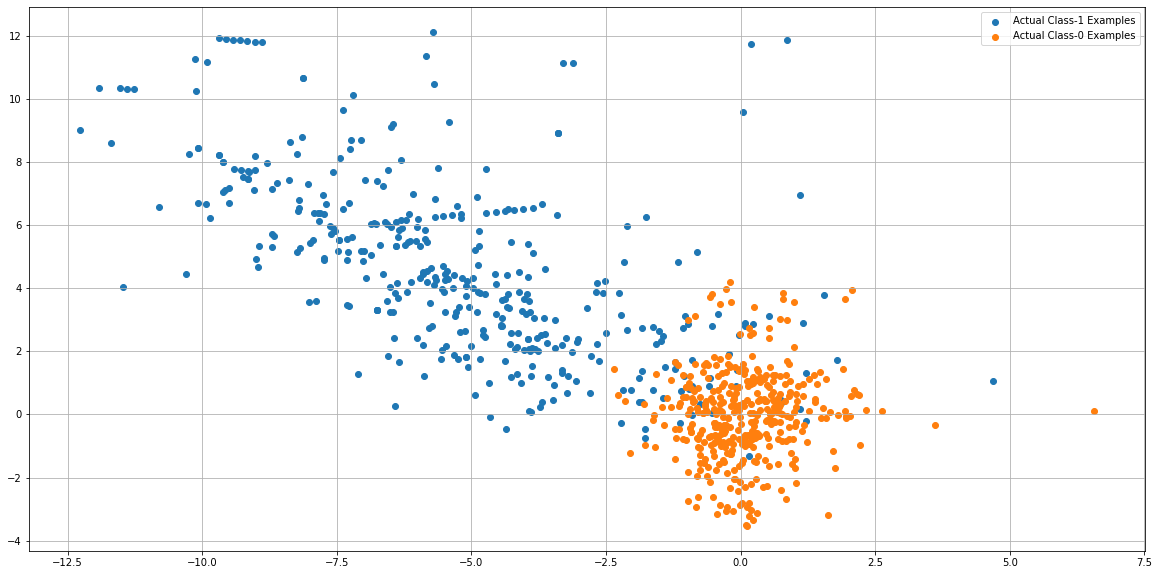

In [341]:
# Variable on Index-14 and Index-4 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.grid()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [344]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))

Train auc = 0.9998557828574018


In [345]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.7640875


We have found that 76.4% is the threshold for which TPR is the highest and FPR is the lowest and we get 99.98% ROC score on the train data.

### Summary to the business
Here, we have to focus on a high recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions,

After performing several models, we have seen that in the balanced dataset with ADASYN technique the XGBoost model has good ROC score(97%) and also high Recall(class 1 99%, class 0 83%). Hence, we can go with the XGBoost model here.
